#### , &copy; [Marikov Artem](https://github.com/ScarlettTheBrave/), 2024

# Лабораторна робота №1. Побудова простого лінійного бінарного класифікатора

__Мета:__ _реалізузвати найпростійший бінарний класифікатор засобами мови Python._

### Завдання для самостійної роботи
1. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).
2. Побудувати бінарний класифікатор і вивести результати бінарної класифікації на графіку.
3. Дати відповіді на контрольні запитання.
4. Відправити результати роботи у файлі lab_1_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

### Хід роботи

[0.30000000000000004, -1]


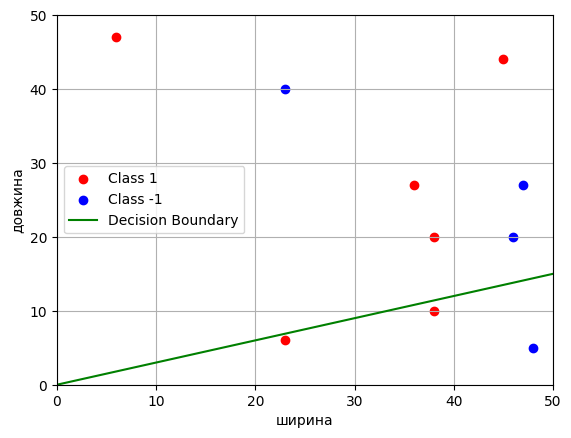

In [2]:
# Варіант 13
import numpy as np
import matplotlib.pyplot as plt

# Навчальні дані
x_train_13 = np.array([[45, 44],
                    [23, 6],
                    [38, 10],
                    [23, 40],
                    [6, 47],
                    [38, 20],
                    [47, 27],
                    [48, 5],
                    [36,27],
                    [46, 20]])
y_train = np.array([1, 1, 1, -1, 1, 1, -1, -1, 1, -1])

n_train = len(x_train_13)                          # Розмір навчальної вибірки
w = [0, -1]                                     # Початкове значення ваги w
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    # Правило класифікації
L = 0.1                                         # Крок зміни ваги
e = 0.1                                         # Невеликий додаток до w0, щоб забезпечити зазор між лінією розділення та областю
count = 0

last_error_index = -1                           # Індекс останньої помилкової спостереження

# Тренування моделі
for _ in range(100):
    count += 1
    for i in range(n_train):                # Ітерація по спостереженням
        if y_train[i]*a(x_train_13[i]) < 0:    # Якщо помилка класифікації,
            w[0] = w[0] + L * y_train[i]    # То коригування ваги w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train_13[i]) < 0])
    if Q == 0:      # Показник якості класифікації (кількість помилок)
        break       # Зупинка, якщо всі класифікуються правильно

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

# Визначення координат для лінії розділення
line_x = np.linspace(0, 50, 100)
line_y = -(w[0]*line_x)/w[1]

# Розділення даних по класам
x_0 = x_train_13[y_train == 1]
x_1 = x_train_13[y_train == -1]

# Візуалізація результатів
plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label='Class 1')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label='Class -1')
plt.plot(line_x, line_y, color='green', label='Decision Boundary')

plt.xlim([0, 50])
plt.ylim([0, 50])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.legend()
plt.grid(True)
plt.show()

<h2 align="center">Відповіді на контрольні запитання</h2>

#### 1. Які основні принципи лежать в основі розпізнавання образів у контексті машинного навчання?
_-застосування датасетів для навчання алгоритмів;
_-використання методів класифікації та регресії для визначення взаємозв’язків у даних.
     
#### 2. Що таке навчальна вибірка і чому вона важлива для процесу розпізнавання образів?
_авчальна вибірка є фундаментальною частиною датасету, що використовується для тренування моделей. Вона містить приклади вхідних даних та їх відповідні мітки. ._

_Навчальна вибірка відіграє важливу роль у процесі розпізнавання образів з декількох причин:_
_- Використовується для перевірки точності моделі. Можна порівняти прогнози моделі з реальними мітками, щоб дізнатися, наскільки точно модель працює;
_- Модель машинного навчання вчиться розпізнавати шаблони в даних на основі навчальної вибірки. Чим більше даних в навчальній вибірці, тим краще модель може вивчити ці шаблони;
_- Якщо навчальна вибірка репрезентативна для реального світу, модель буде краще працювати на нових, невідомих даних. Це означає, що модель буде краще розпізнавати образи, які вона не бачила під час навчання.

#### 3. Сформулювати постановку задачі бінарної класифікації.
__Постановка:__
_- Нехай у нас є набір тренувальних даних, який складається з пар (xᵢ​,yᵢ), де xᵢ​ - це вектор ознак об’єкта, а yᵢ - цільова змінна, яка приймає значення 0 або 1;_
_- Ми хочемо побудувати модель f(x), яка буде приймати вектор ознак x і виводити прогнозовану мітку класу;_
_- Модель навчається, мінімізуючи втрати на тренувальному наборі даних. Втрати вимірюють різницю між прогнозованими мітками моделі та істинними мітками;_
_- Після навчання модель оцінюється на тестовому наборі даних. Метрики оцінки можуть включати точність, AUC-ROC, F1-міру тощо;_
_- З використанням навченої моделі ми можемо класифікувати нові, невідомі об’єкти, передбачаючи, до якого класу вони належать._


#### 4. Що таке рівняння гіперплощини, і як воно використовується для розв’язання задачі бінарної класифікації?
_Рівняння гіперплощини - це лінійна розділяюча поверхня, яка використовується для розділення об'єктів у просторі на два класи. Це використовується для розв'язання задачі бінарної класифікації шляхом встановлення границі між класами._

#### 5. Навести кроки для розв’язання простої задачі бінарної класифікації за допомогою машинного навчання.
_- Збір та обробка даних;_
_- Розподіл набору даних на тренувальний і тестовий набори;_
_- Вибір моделі - логістична регресія, дерева рішень або нейронні мережі;_
_- Тренування моделі на навчальній вибірці;_
_- Оцінка моделі за тестовим набором даних;_
_- Тестування моделі на тестовій вибірці для оцінки її ефективності._



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3b771292-09f5-4cd0-adfb-1b3b61d985cf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>